## **Logistic**

## **1.Instalaciones**

In [4]:
!pip install MissForest lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.5 MB/s eta 0:00:00


In [5]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from missforest import MissForest
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import shap
import lightgbm as lgb
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge
from scipy.stats import randint, uniform





In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## **2.Subimos Database**

In [7]:
from google.colab import files
uploaded = files.upload()

Saving bank-data.csv to bank-data.csv


## **3. Abrimos Database**

In [8]:
df = pd.read_csv('bank-data.csv', sep=';')
pd.set_option('display.max_columns', None)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [9]:
df.shape

(41188, 21)

## **4.Revisamos que valores toman las Columnas:**

In [10]:
for col in df.columns:
    print(f"\nColumna: {col}")

    # Conteos absolutos
    conteos = df[col].value_counts(dropna=False)

    # Porcentajes
    porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combinar en un solo DataFrame
    resumen = pd.DataFrame({
        'Conteo': conteos,
        'Porcentaje (%)': porcentajes.round(2)
    })

    print(resumen)


Columna: age
     Conteo  Porcentaje (%)
age                        
31     1947            4.73
32     1846            4.48
33     1833            4.45
36     1780            4.32
35     1759            4.27
..      ...             ...
91        2            0.00
98        2            0.00
95        1            0.00
87        1            0.00
94        1            0.00

[78 rows x 2 columns]

Columna: job
               Conteo  Porcentaje (%)
job                                  
admin.          10422           25.30
blue-collar      9254           22.47
technician       6743           16.37
services         3969            9.64
management       2924            7.10
retired          1720            4.18
entrepreneur     1456            3.54
self-employed    1421            3.45
housemaid        1060            2.57
unemployed       1014            2.46
student           875            2.12
unknown           330            0.80

Columna: marital
          Conteo  Porcentaje (%)
ma

## **5.Cambiamos nombre de Y a Deposito**

In [11]:
df.rename(columns={'y': 'deposito'}, inplace=True)

## **6. Reemplazamos las palabras NAN NULL UNKNOWN NOENXISTENT 999 POR NAN en nuestro Dataset**

In [12]:
df.replace(["nan", "NULL", "unknown", "nonexistent", "999", 999], np.nan, inplace=True)

faltantes = df.isna().mean()*100
faltantes[faltantes>0]

,0
job,0.80
marital,0.19
education,4.20
default,20.87
housing,2.40
loan,2.40
duration,0.00
pdays,96.32
poutcome,86.34


In [13]:
print(df.shape)

(41188, 21)


## **6. Identificar columnas con columnas constantes**   No tenemos columnas con valores constantes


In [14]:
unicos = df.nunique()
df[unicos[unicos==1].index]
df[unicos[unicos==1].index].head(5)

""
0
1
2
3
4


## **7. Eliminamos filas y columnas duplicadas** Eliminamos 12 filas y No hay columnas Duplicadas.

In [15]:
df.duplicated().sum()

np.int64(12)

In [16]:
df[df.duplicated(keep=False)]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
12260,36,retired,married,NaN,no,no,no,telephone,jul,thu,88.00,1,NaN,0,NaN,1.40,93.92,-42.70,4.97,5228.10,no
12261,36,retired,married,NaN,no,no,no,telephone,jul,thu,88.00,1,NaN,0,NaN,1.40,93.92,-42.70,4.97,5228.10,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331.00,2,NaN,0,NaN,1.40,93.92,-42.70,4.96,5228.10,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331.00,2,NaN,0,NaN,1.40,93.92,-42.70,4.96,5228.10,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43.00,3,NaN,0,NaN,1.40,93.92,-42.70,4.96,5228.10,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43.00,3,NaN,0,NaN,1.40,93.92,-42.70,4.96,5228.10,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128.00,1,NaN,0,NaN,1.40,93.92,-42.70,4.97,5228.10,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128.00,1,NaN,0,NaN,1.40,93.92,-42.70,4.97,5228.10,no


In [17]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.duplicated().sum()


np.int64(0)

In [18]:
df.T.duplicated().sum()

np.int64(0)

In [19]:
df.T.duplicated(keep=False)

,0
age,False
job,False
marital,False
education,False
default,False
housing,False
loan,False
contact,False
month,False
day_of_week,False


## **8. Eliminamos Columnas redundantes**

In [20]:
pd.set_option('display.max_columns', None)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,198.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,217.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50.00,1,NaN,0,NaN,1.10,93.99,-36.40,4.86,5191.00,no


## **9.Eliminar columnas Data leakage**

In [21]:
##df.drop('deposito', axis=1, inplace=True)

## **10. Valores faltantes por columna** Tiene que ser mayor a 40 % Para poder eliminarlas
mnar, mar, mcar... Eliminamos 2

In [22]:
df.shape

(41176, 21)

In [23]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

,0
job,0.80
marital,0.19
education,4.20
default,20.88
housing,2.40
loan,2.40
duration,0.00
pdays,96.32
poutcome,86.34


Eliminamos poutcome

In [24]:
df = df.drop(["poutcome", "pdays"], axis=1)

In [25]:
df.shape

(41176, 19)

## **11. Valores faltantes por filas**. Se mira cuantas valores faltantes hay en los clientes. No eliminamos ninguna

In [26]:
df.isnull().any(axis=1).sum()

np.int64(10700)

In [27]:
n = 2
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,217.00,1,0,1.10,93.99,-36.40,4.86,5191.00,no
10,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,55.00,1,0,1.10,93.99,-36.40,4.86,5191.00,no
35,55,NaN,married,basic.4y,NaN,yes,no,telephone,may,mon,336.00,1,0,1.10,93.99,-36.40,4.86,5191.00,no
78,55,management,married,NaN,NaN,yes,no,telephone,may,mon,272.00,1,0,1.10,93.99,-36.40,4.86,5191.00,no
92,60,admin.,married,NaN,NaN,no,yes,telephone,may,mon,213.00,2,0,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41002,31,technician,single,professional.course,no,NaN,NaN,cellular,oct,thu,212.00,2,0,-1.10,94.60,-49.50,1.02,4963.60,yes
41003,34,admin.,divorced,university.degree,no,NaN,NaN,cellular,oct,thu,256.00,2,1,-1.10,94.60,-49.50,1.02,4963.60,no
41017,46,management,married,university.degree,no,NaN,NaN,cellular,oct,mon,83.00,2,2,-1.10,94.60,-49.50,1.03,4963.60,no
41096,64,NaN,married,NaN,no,no,no,cellular,nov,mon,78.00,1,3,-1.10,94.77,-50.80,1.05,4963.60,no


In [28]:
n = 3
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
73,57,NaN,married,NaN,NaN,no,no,telephone,may,mon,211.00,1,0,1.10,93.99,-36.40,4.86,5191.00,no
81,51,blue-collar,married,basic.4y,NaN,NaN,NaN,telephone,may,mon,212.00,1,0,1.10,93.99,-36.40,4.86,5191.00,no
91,57,NaN,married,NaN,NaN,yes,no,telephone,may,mon,48.00,1,0,1.10,93.99,-36.40,4.86,5191.00,no
299,38,NaN,married,NaN,NaN,no,no,telephone,may,mon,362.00,4,0,1.10,93.99,-36.40,4.86,5191.00,no
343,57,NaN,married,NaN,NaN,yes,no,telephone,may,mon,325.00,2,0,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40086,62,technician,married,NaN,no,NaN,NaN,cellular,jul,mon,220.00,3,1,-1.70,94.22,-40.30,0.83,4991.60,yes
40267,25,self-employed,single,NaN,no,NaN,NaN,cellular,jul,wed,844.00,5,2,-1.70,94.22,-40.30,0.90,4991.60,yes
40644,67,NaN,divorced,NaN,NaN,yes,no,cellular,sep,wed,220.00,2,2,-1.10,94.20,-37.50,0.88,4963.60,yes
40649,31,student,single,NaN,no,NaN,NaN,cellular,sep,wed,708.00,2,2,-1.10,94.20,-37.50,0.88,4963.60,yes


In [29]:
n = 4
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
29,55,NaN,married,university.degree,NaN,NaN,NaN,telephone,may,mon,362.00,1,0,1.10,93.99,-36.40,4.86,5191.00,no
768,38,technician,married,NaN,NaN,NaN,NaN,telephone,may,wed,162.00,2,0,1.10,93.99,-36.40,4.86,5191.00,no
1914,44,NaN,single,basic.9y,NaN,NaN,NaN,telephone,may,fri,226.00,2,0,1.10,93.99,-36.40,4.86,5191.00,no
1948,34,blue-collar,married,NaN,NaN,NaN,NaN,telephone,may,fri,298.00,2,0,1.10,93.99,-36.40,4.86,5191.00,no
2005,57,blue-collar,married,NaN,NaN,NaN,NaN,telephone,may,mon,98.00,3,0,1.10,93.99,-36.40,4.86,5191.00,no
4342,38,blue-collar,divorced,NaN,NaN,NaN,NaN,telephone,may,tue,81.00,2,0,1.10,93.99,-36.40,4.86,5191.00,no
7328,42,blue-collar,married,NaN,NaN,NaN,NaN,telephone,may,fri,311.00,4,0,1.10,93.99,-36.40,4.86,5191.00,no
8838,59,technician,married,NaN,NaN,NaN,NaN,telephone,jun,thu,247.00,2,0,1.40,94.47,-41.80,4.87,5228.10,no
10640,49,admin.,single,NaN,NaN,NaN,NaN,telephone,jun,tue,479.00,1,0,1.40,94.47,-41.80,4.96,5228.10,no
10922,51,blue-collar,divorced,NaN,NaN,NaN,NaN,telephone,jun,wed,339.00,2,0,1.40,94.47,-41.80,4.96,5228.10,no


In [30]:
n = 5
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito
2722,45,NaN,married,NaN,NaN,NaN,NaN,telephone,may,wed,179.00,1,0,1.10,93.99,-36.40,4.86,5191.00,no
21549,44,NaN,married,NaN,NaN,NaN,NaN,cellular,aug,tue,163.00,1,0,1.40,93.44,-36.10,4.96,5228.10,no


In [31]:
n = 6
df[df.isnull().sum(axis=1) ==n]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposito


<Axes: >

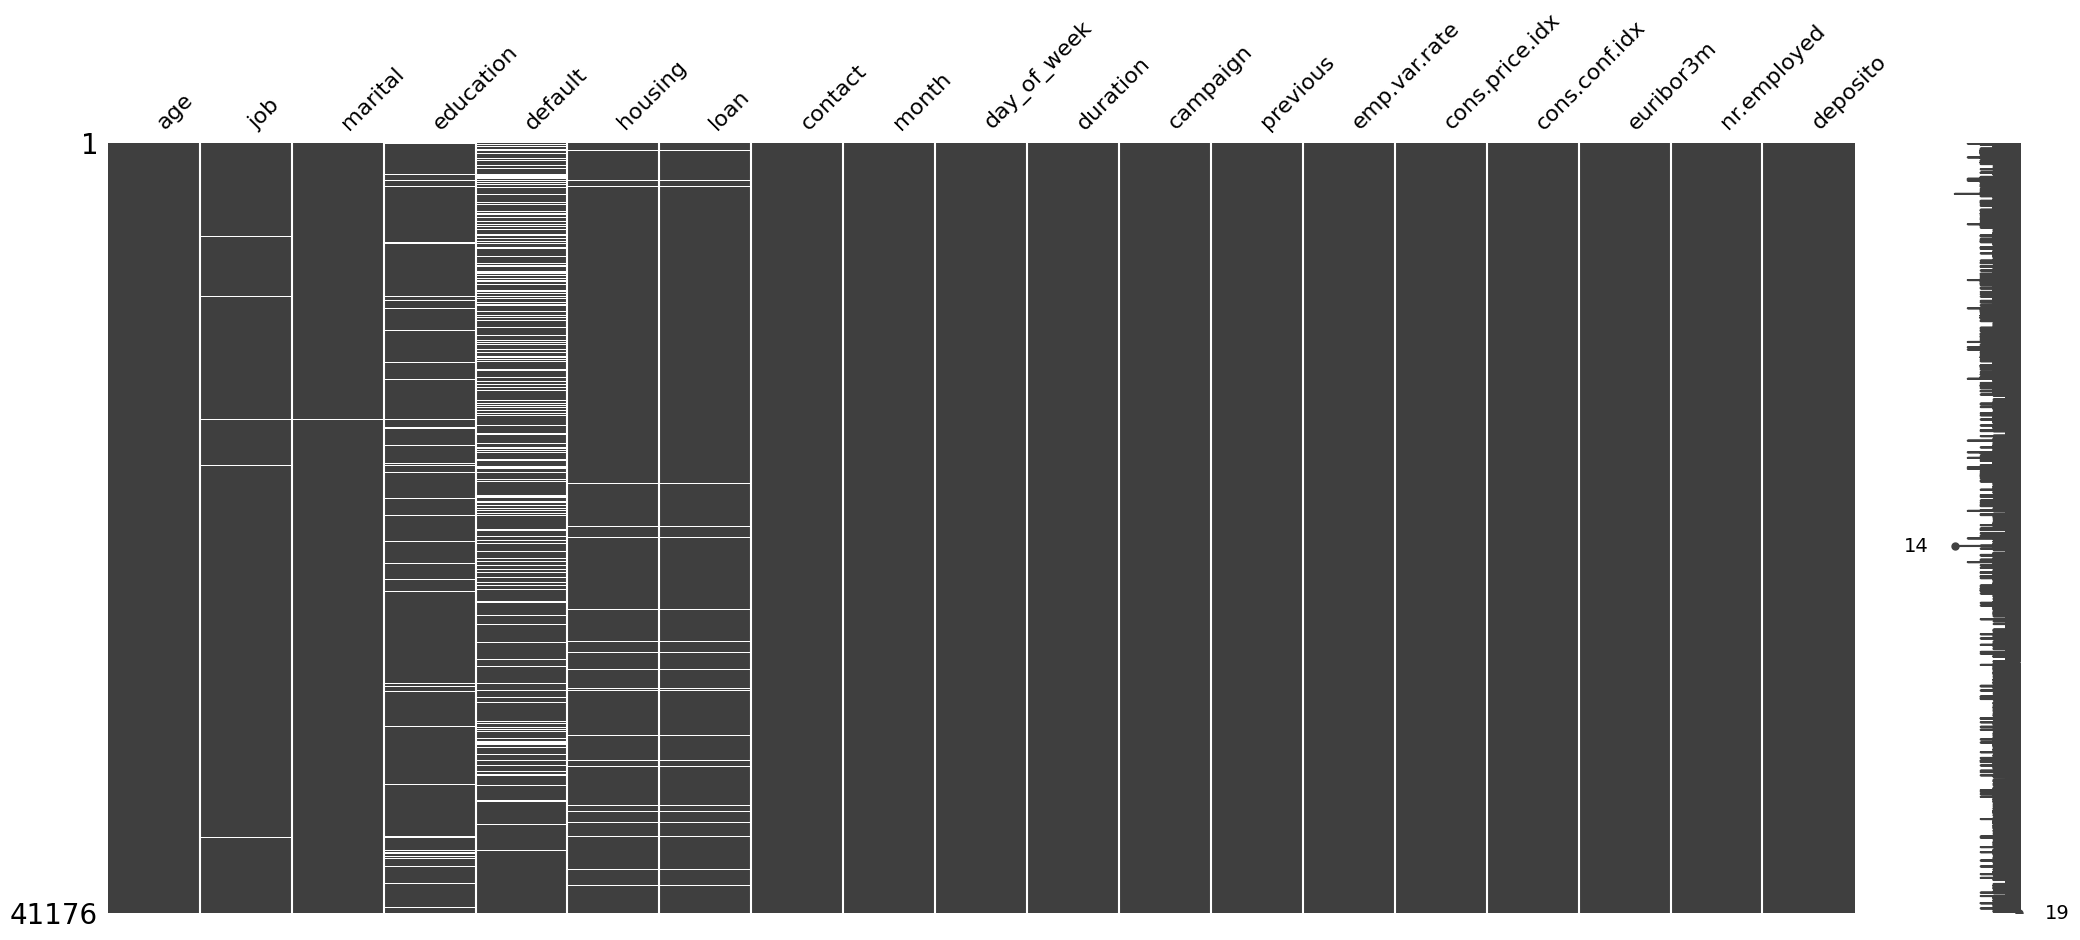

In [32]:
msno.matrix(df)

## **12. Convertir variables Y a binaria.**

In [33]:
df['deposito'] = df['deposito'].map({'yes': 1, 'no': 0})

## **13. Categorizar Variables String. Menos la de Target Encoding que Tenemos que hacerla despues de Train Split**

In [34]:
categoricas = df.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object')


In [35]:
mapping_education = {
    'university.degree': 7,
    'high.school': 6,
    'basic.9y': 5,
    'professional.course': 4,
    'basic.4y': 3,
    'basic.6y': 2,
    'unknown': 1,
    'illiterate': 0
}
df['education_encoded'] = df['education'].map(mapping_education)

In [36]:
mapping_day_of_week = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
}

df['day_of_week_encoded'] = df['day_of_week'].map(mapping_day_of_week)

In [37]:
mapping_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

df['month_encoded'] = df['month'].map(mapping_month)

In [38]:
mapping_binary = {
    'no': 0,
    'yes': 1
}

df['default_encoded'] = df['default'].map(mapping_binary)
df['housing_encoded'] = df['housing'].map(mapping_binary)
df['loan_encoded'] = df['loan'].map(mapping_binary)

In [39]:
mapping_contact = {
    'telephone': 0,
    'cellular': 1
}

df['contact_encoded'] = df['contact'].map(mapping_contact)
mapping_marital = {
    'single': 0,
    'married': 1,
    'divorced': 2
}

df['marital_encoded'] = df['marital'].map(mapping_marital)

## **14. Borrar las categorías que estaban en String** Menos la de Target Encoding. Job


In [40]:
df.drop(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'], axis=1, inplace=True)

## **15. Hacer Train-Split**

In [41]:
X = df.drop('deposito',axis=1)
y = df['deposito']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.columns

Index(['age', 'job', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'education_encoded', 'day_of_week_encoded', 'month_encoded',
       'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded',
       'marital_encoded'],
      dtype='object')

In [44]:
X_train.shape

(32940, 18)

## **16. Categorizar Job. por Target Encoding**

In [45]:
temp = X_train.copy()
temp['deposito'] = y_train

# Crear el mapping
job_mapping = temp.groupby('job')['deposito'].mean()
print(job_mapping)

# Aplicar el Target Encoding
X_train['job_encoded'] = X_train['job'].map(job_mapping)
X_test['job_encoded'] = X_test['job'].map(job_mapping)


job
admin.          0.13
blue-collar     0.07
entrepreneur    0.08
housemaid       0.10
management      0.11
retired         0.25
self-employed   0.11
services        0.08
student         0.31
technician      0.10
unemployed      0.14
Name: deposito, dtype: float64


## **17. Quitar la Categoria Job. Recien Categorizadas**

In [46]:
X_train.drop(['job'], axis=1, inplace=True)
X_test.drop(['job'], axis=1, inplace=True)

## **18. Chequear los NA**

In [47]:
faltantes = X_train.isna().mean()*100
faltantes[faltantes>0]

,0
duration,0.00
education_encoded,4.23
default_encoded,20.73
housing_encoded,2.40
loan_encoded,2.40
marital_encoded,0.20
job_encoded,0.83


## **18. Imputar** Usamos librería Missforest

<Axes: >

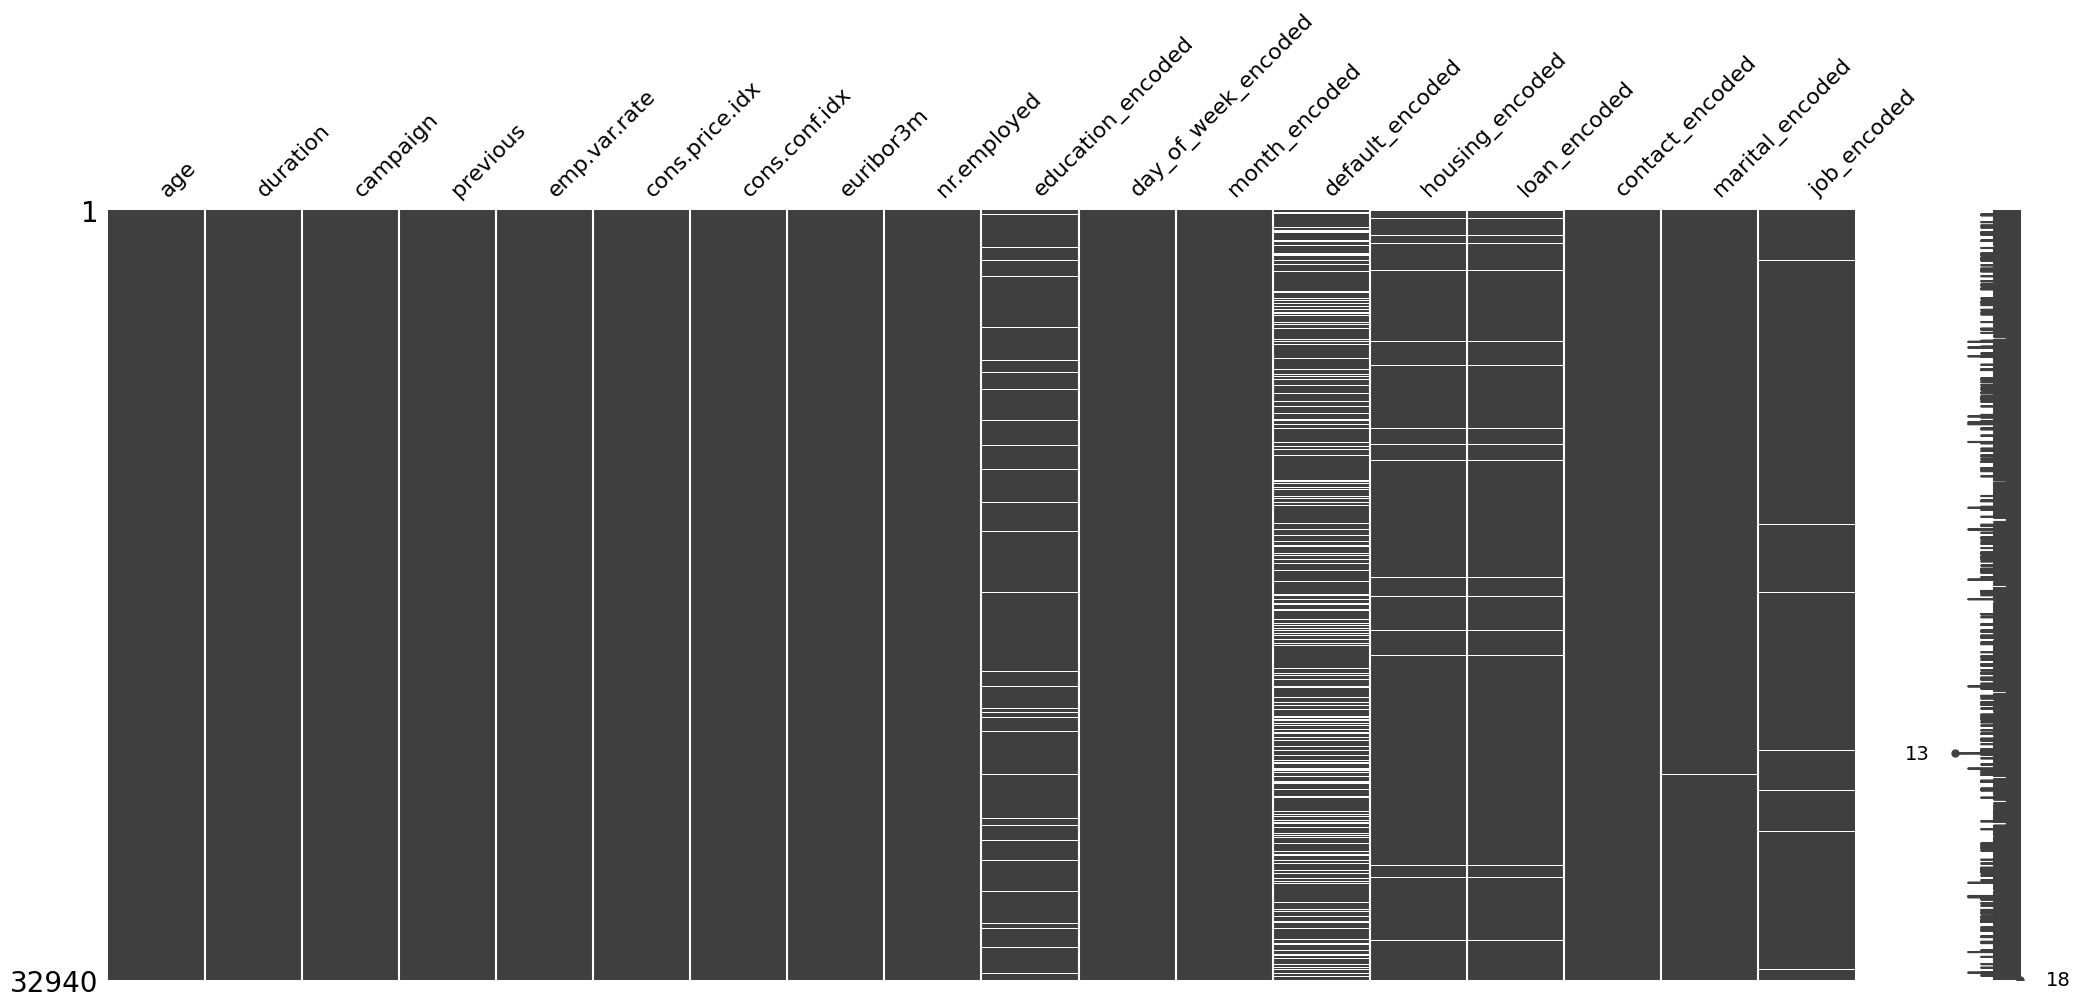

In [48]:
msno.matrix(X_train)

In [49]:
X_train[['job_encoded','education_encoded','default_encoded','housing_encoded','loan_encoded','marital_encoded','duration']]

,job_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,marital_encoded,duration
12346,0.08,2.00,0.00,1.00,1.00,1.00,286.00
8564,0.13,7.00,0.00,0.00,0.00,0.00,178.00
21417,0.13,7.00,0.00,0.00,0.00,0.00,103.00
3315,0.13,7.00,0.00,0.00,0.00,0.00,135.00
33236,0.07,6.00,NaN,0.00,0.00,0.00,418.00
...,...,...,...,...,...,...,...
6265,0.07,5.00,0.00,0.00,1.00,1.00,100.00
11284,0.13,5.00,0.00,1.00,0.00,1.00,120.00
38158,0.25,3.00,0.00,0.00,0.00,1.00,250.00
860,0.11,7.00,0.00,1.00,0.00,1.00,295.00


In [50]:
categoricas = X_train.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index([], dtype='object')


In [51]:
X_train['job_encoded'].value_counts(normalize=True)*100
X_train['education_encoded'].value_counts(normalize=True)*100
X_train['default_encoded'].value_counts(normalize=True)*100
X_train['housing_encoded'].value_counts(normalize=True)*100
X_train['loan_encoded'].value_counts(normalize=True)*100
X_train['marital_encoded'].value_counts(normalize=True)*100
X_train['duration'].value_counts(normalize=True)*100

,proportion
duration,
90.00,0.44
85.00,0.43
72.00,0.42
136.00,0.42
73.00,0.41
...,...
1329.00,0.00
1368.00,0.00
1123.00,0.00


In [52]:
imputer = MissForest()

X_train_imp = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

100%|██████████| 4/4 [00:00<00:00, 12.63it/s]


In [53]:
X_train_imp['marital_encoded'].value_counts(normalize=True)*100

,proportion
marital_encoded,
1.00,60.43
0.00,28.11
2.00,11.27
1.07,0.00
0.85,0.00
...,...
1.25,0.00
0.28,0.00
1.07,0.00


In [54]:
X_test.dtypes

,0
age,int64
duration,float64
campaign,int64
previous,int64
emp.var.rate,float64
cons.price.idx,float64
cons.conf.idx,float64
euribor3m,float64
nr.employed,float64
education_encoded,float64


In [55]:
X_test[['job_encoded','education_encoded','default_encoded','housing_encoded','loan_encoded','marital_encoded','duration']]

,job_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,marital_encoded,duration
36254,0.25,4.00,0.00,1.00,1.00,1.00,1460.00
32662,0.07,5.00,0.00,0.00,0.00,1.00,248.00
40860,0.10,4.00,0.00,1.00,0.00,1.00,275.00
32897,0.13,6.00,0.00,1.00,1.00,1.00,186.00
16461,0.08,5.00,0.00,1.00,0.00,0.00,184.00
...,...,...,...,...,...,...,...
18999,0.07,3.00,0.00,0.00,0.00,1.00,76.00
34242,0.10,5.00,0.00,1.00,0.00,1.00,7.00
13573,0.14,7.00,NaN,0.00,0.00,1.00,106.00
1871,0.07,4.00,0.00,1.00,0.00,1.00,106.00


In [56]:
categoricas = X_test.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index([], dtype='object')


In [57]:

X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)


 50%|█████     | 2/4 [00:00<00:00, 19.12it/s]


In [58]:
X_train_imp.shape

(32940, 18)

## **19.Outliers**

In [59]:
X_train_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32940.00,40.04,10.43,17.00,32.00,38.00,47.00,98.00
duration,32940.00,256.95,258.08,0.00,102.00,178.00,318.00,4918.00
campaign,32940.00,2.58,2.78,1.00,1.00,2.00,3.00,56.00
previous,32940.00,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,32940.00,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,32940.00,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,32940.00,-40.52,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,32940.00,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,32940.00,5167.06,72.37,4963.60,5099.10,5191.00,5228.10,5228.10
education_encoded,32940.00,5.32,1.55,0.00,4.00,6.00,7.00,7.00


In [60]:
iso = IsolationForest(random_state=123)
df_num = X_train_imp.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train_imp)

In [61]:
df_num['outlier_flag'].value_counts()

,count
outlier_flag,
1,25613
-1,7327


## **20. Seleccion de Características**

Método 1: Feature importance de RF

In [62]:
# Entrenamiento de RF
model = RandomForestRegressor(random_state=42,n_jobs=-1).fit(X_train_imp, y_train)

In [63]:
# Importancia de características
importances = model.feature_importances_/model.feature_importances_.sum()*100

# Convertir a DataFrame
df_rf_imp = pd.DataFrame({'feature': X_train_imp.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()

In [64]:
df_rf_imp

,feature,rf_importance,rf_importance_acum
1,duration,35.06,35.06
8,nr.employed,15.82,50.88
0,age,9.32,60.21
7,euribor3m,9.01,69.21
17,job_encoded,4.32,73.54
9,education_encoded,3.96,77.50
2,campaign,3.75,81.25
10,day_of_week_encoded,3.54,84.79
6,cons.conf.idx,2.07,86.87
12,default_encoded,2.01,88.88


Método 2: Permutation/Shuffle importance

In [65]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train_imp, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)

In [66]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(model_xgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')

In [67]:
df_perm_imp = pd.DataFrame({'feature': X_train.columns, 'perm_imp': perm.importances_mean*100}).sort_values('perm_imp', ascending=False)
df_perm_imp

,feature,perm_imp
7,euribor3m,36375851381555200.00
4,emp.var.rate,34026550575759364.00
8,nr.employed,9612229418680320.00
1,duration,8442919874723841.00
5,cons.price.idx,5244140640010240.00
11,month_encoded,4491901277306879.50
10,day_of_week_encoded,3827870140989440.00
0,age,3004880251781120.00
6,cons.conf.idx,1567500659589120.00
17,job_encoded,1476342998630400.00


Método 3: SHAP

In [68]:
# Ajustamos el modelo
model_lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1).fit(X_train1, y_train1)

explainer = shap.Explainer(model_lgbm, X_val)   # usa el mismo X_val
shap_vals = explainer(X_val).values

 94%|=================== | 6209/6588 [00:14<00:00]       

In [69]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap/imp_shap.sum()*100
df_shap_imp = pd.DataFrame({"feature": X_val.columns, "shap_imp": imp_shap_pct}).sort_values('shap_imp', ascending=False)
df_shap_imp

,feature,shap_imp
1,duration,27.61
8,nr.employed,18.65
4,emp.var.rate,18.41
7,euribor3m,15.69
6,cons.conf.idx,5.55
15,contact_encoded,2.25
2,campaign,1.79
5,cons.price.idx,1.68
0,age,1.57
10,day_of_week_encoded,1.21


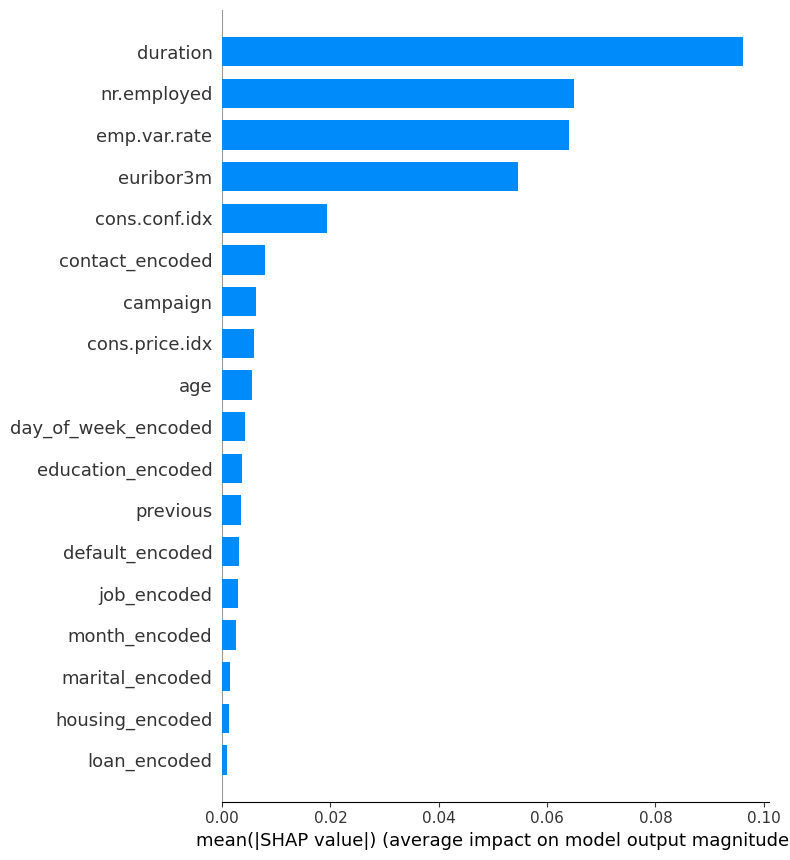

In [70]:
# --- SHAP Summary Bar Plot ---
shap.summary_plot(shap_vals, X_val, plot_type="bar")

Unión 3 métodos

In [71]:
df_importances = (
    df_rf_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
7,duration,35.06,35.06,8442919874723841.00,27.61
16,nr.employed,15.82,50.88,9612229418680320.00,18.65
0,age,9.32,60.21,3004880251781120.00,1.57
10,euribor3m,9.01,69.21,36375851381555200.00,15.69
12,job_encoded,4.32,73.54,1476342998630400.00,0.86
8,education_encoded,3.96,77.50,638030813593600.00,1.07
1,campaign,3.75,81.25,139724849152000.00,1.79
5,day_of_week_encoded,3.54,84.79,3827870140989440.00,1.21
2,cons.conf.idx,2.07,86.87,1567500659589120.00,5.55
6,default_encoded,2.01,88.88,190506462085120.00,0.89


In [72]:
df_filt = df_importances[(df_importances['rf_importance']>=1)&(df_importances['perm_imp']>=1)&(df_importances['shap_imp']>=1)]
df_filt

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
7,duration,35.06,35.06,8442919874723841.00,27.61
16,nr.employed,15.82,50.88,9612229418680320.00,18.65
0,age,9.32,60.21,3004880251781120.00,1.57
10,euribor3m,9.01,69.21,36375851381555200.00,15.69
8,education_encoded,3.96,77.50,638030813593600.00,1.07
1,campaign,3.75,81.25,139724849152000.00,1.79
5,day_of_week_encoded,3.54,84.79,3827870140989440.00,1.21
2,cons.conf.idx,2.07,86.87,1567500659589120.00,5.55
17,previous,1.76,92.57,318376194867200.00,1.01
3,cons.price.idx,1.45,97.30,5244140640010240.00,1.68


OPCIONAL PARA LA PRÁCTICA DEL EDA

In [73]:
features = df_filt['feature']
features

,feature
7,duration
16,nr.employed
0,age
10,euribor3m
8,education_encoded
1,campaign
5,day_of_week_encoded
2,cons.conf.idx
17,previous
3,cons.price.idx


In [74]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train_imp[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
duration,1.01
nr.employed,31.18
age,1.05
euribor3m,46.81
education_encoded,1.05
campaign,1.04
day_of_week_encoded,1.00
cons.conf.idx,2.59
previous,1.35
cons.price.idx,4.70


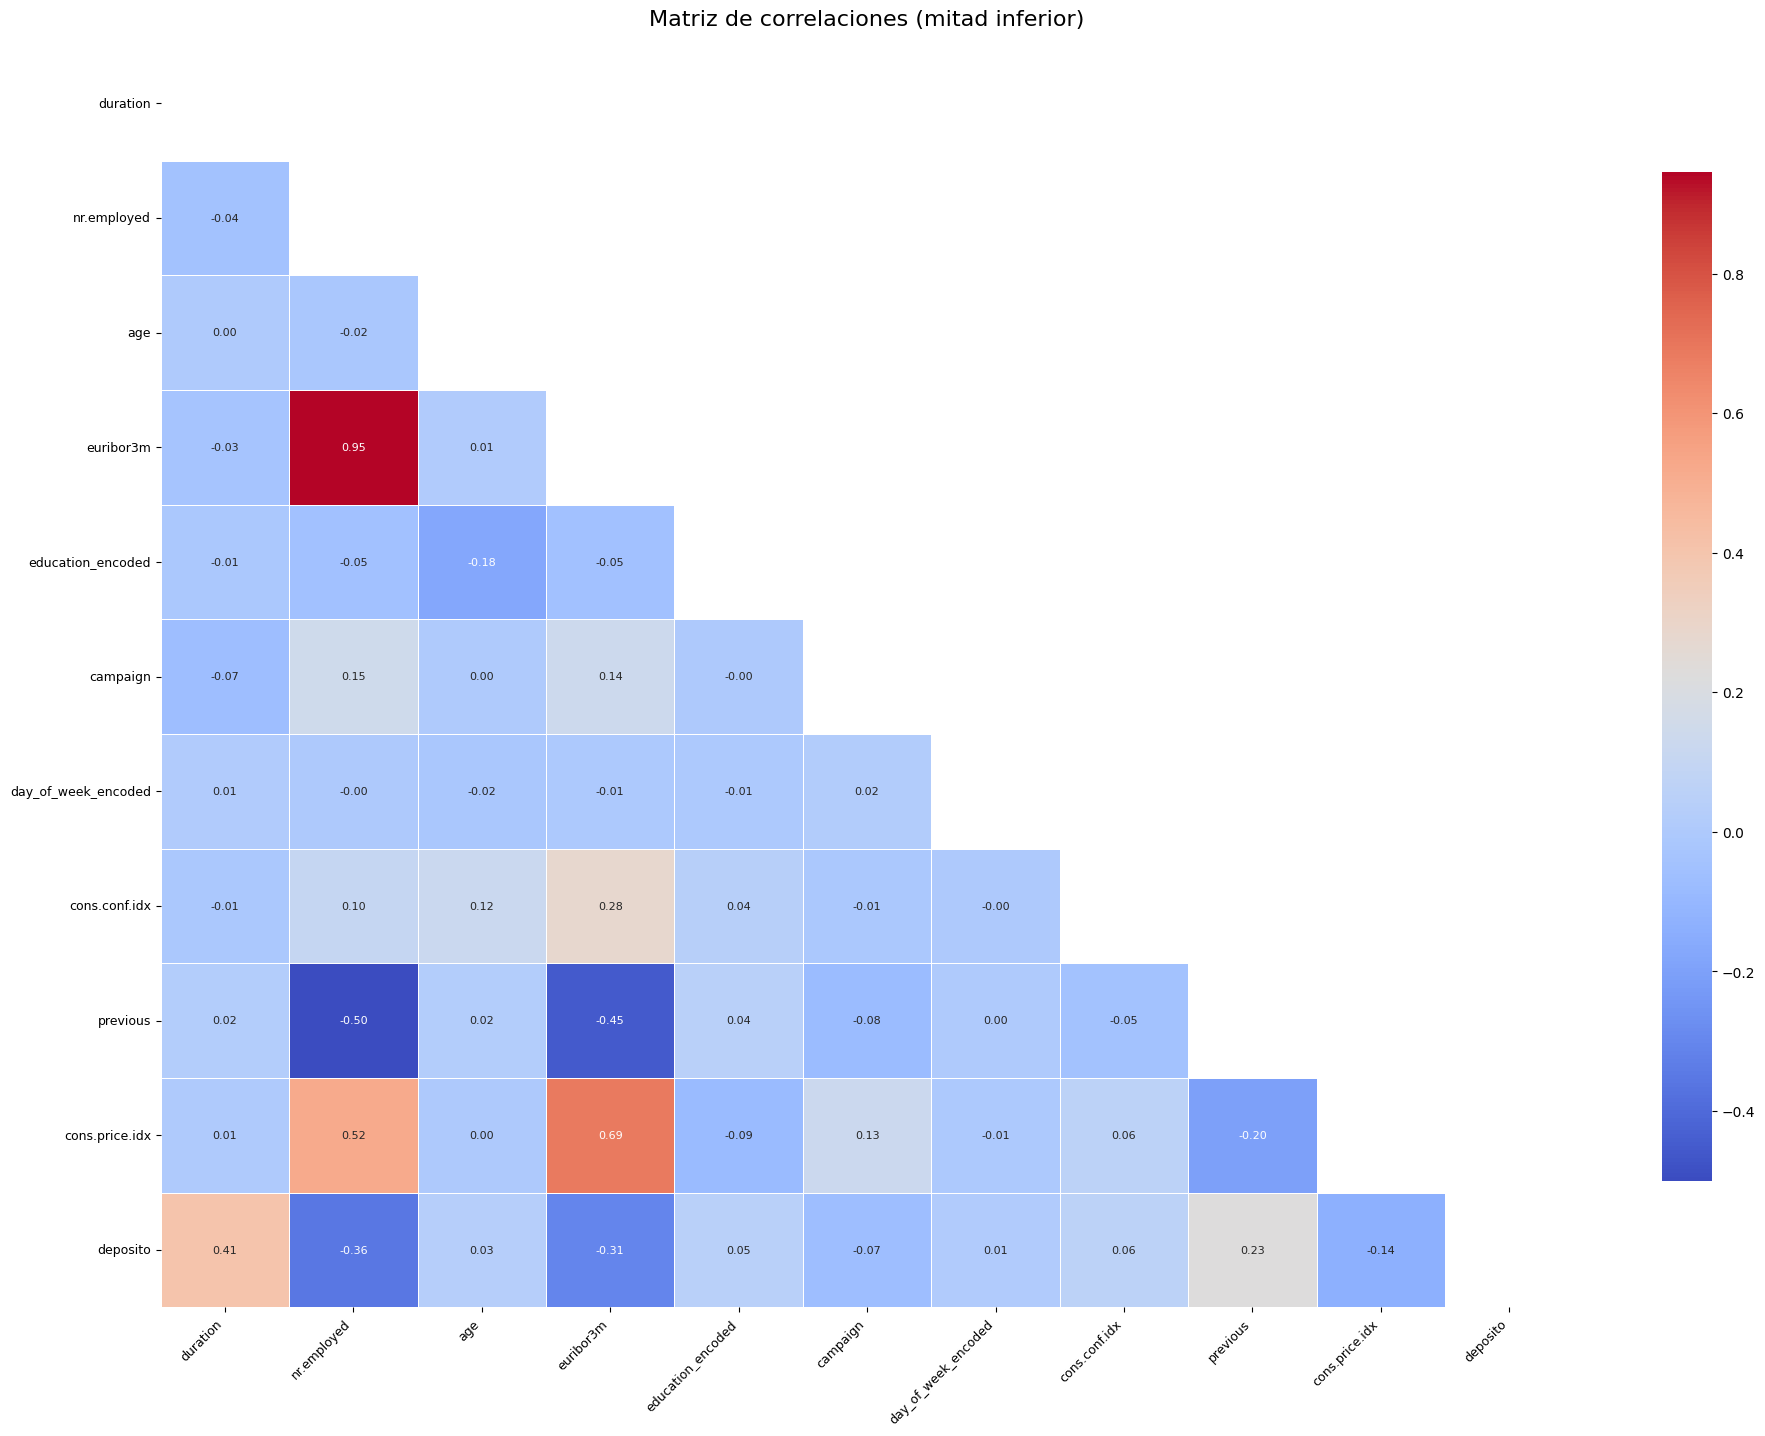

In [75]:
X_copy = X_train_imp[features].copy()
X_copy['deposito'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

## **21.Cross Validation**

In [76]:
# Versión 1: Realizar cross_validation con todas las características que son candidatas
cv_results1 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train_imp[features], y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [77]:
cv_results1.mean()*-1

np.float64(261461484923956.84)

In [78]:
# Versión 2: Realizar cross_validation con  las características que son candidatas sin las correlacionadas
cv_results2 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train_imp[features].drop(['euribor3m','cons.conf.idx'],axis=1), y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [79]:
cv_results2.mean()*-1

np.float64(270377855661622.84)

## **22.Modelado**

In [80]:
# Selecciona la caracteristicas con las que hemos determinado que vamos a proseguir el análisis
X_train_sel = X_train_imp[features]
X_test_sel = X_test_imp[features]

In [81]:
X_train_sel.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,32940.00,256.95,258.08,0.00,102.00,178.00,318.00,4918.00
nr.employed,32940.00,5167.06,72.37,4963.60,5099.10,5191.00,5228.10,5228.10
age,32940.00,40.04,10.43,17.00,32.00,38.00,47.00,98.00
euribor3m,32940.00,3.62,1.73,0.63,1.34,4.86,4.96,5.04
education_encoded,32940.00,5.32,1.55,0.00,4.00,6.00,7.00,7.00
campaign,32940.00,2.58,2.78,1.00,1.00,2.00,3.00,56.00
day_of_week_encoded,32940.00,2.98,1.41,1.00,2.00,3.00,4.00,5.00
cons.conf.idx,32940.00,-40.52,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
previous,32940.00,0.17,0.49,0.00,0.00,0.00,0.00,7.00
cons.price.idx,32940.00,93.58,0.58,92.20,93.08,93.75,93.99,94.77


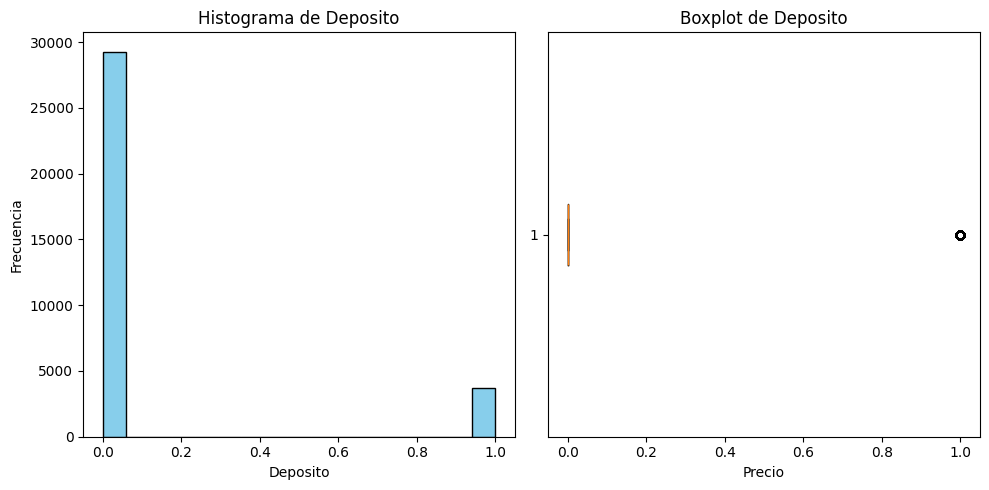

In [82]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Deposito')
ax[0].set_xlabel('Deposito')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de Deposito')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [83]:
y_train.skew()

np.float64(2.4710795926149975)

In [84]:
y_train.describe()

,deposito
count,32940.00
mean,0.11
std,0.31
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


## **23.Escalar los datos**

In [85]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train_sel)
X_test_sc = scaler.transform(X_test_sel)

## **24. Comparativa de algoritmos**

In [86]:
# Tenemos que obtener un conjunto de validación para validar la decisión de qué algoritmo elegir
X_train_sc1, X_val_sc, y_train1, y_val = train_test_split(X_train_sc, y_train, test_size=0.2, random_state=42)

In [87]:
models_to_try = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(n_estimators=200),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "SVR": SVR(),
    "DecisionTree": DecisionTreeRegressor(),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=200),
    "Bagging": BaggingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge()
}

for name, model in models_to_try.items():
    try:
        model.fit(X_train_sc1, y_train1)
        score = model.score(X_val_sc, y_val)
        print(f"{name}: {score:.3f}")
    except Exception as e:
        print(f"{name} falló con error: {e}")

LinearRegression: 0.298
Ridge: 0.298
Lasso: -0.000
RandomForest: 0.404
GradientBoosting: 0.416
AdaBoost: 0.174
KNeighbors: 0.268
SVR: 0.313
DecisionTree: -0.134
ExtraTrees: 0.389
Bagging: 0.347
HistGradientBoosting: 0.429
ElasticNet: -0.000
BayesianRidge: 0.298


## **25.Reentrenar con todo el conjunto de entrenamiento y probar en el test**

In [95]:
# Espacio de búsqueda
param_dist = {
    'max_iter': randint(100, 1000),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(0.01, 0.3),
    'min_samples_leaf': randint(20, 200),
    'max_leaf_nodes': randint(20, 100)
}

model = HistGradientBoostingRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,                  # Número de combinaciones aleatorias a probar
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=4,
    n_jobs=-1,
    random_state=123
)

random_search.fit(X_train_sc1, y_train1)

print("Mejores hiperparámetros:")
print(random_search.best_params_)

best_model = random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores hiperparámetros:
{'learning_rate': np.float64(0.06474751913605), 'max_depth': 5, 'max_iter': 440, 'max_leaf_nodes': 59, 'min_samples_leaf': 86}


In [96]:
best_model = random_search.best_estimator_
print(best_model)

HistGradientBoostingRegressor(learning_rate=np.float64(0.06474751913605),
                              max_depth=5, max_iter=440, max_leaf_nodes=59,
                              min_samples_leaf=86, random_state=42)


In [97]:
best_model.fit(X_train[features], y_train)

HistGradientBoostingRegressor(learning_rate=np.float64(0.06474751913605),
                              max_depth=5, max_iter=440, max_leaf_nodes=59,
                              min_samples_leaf=86, random_state=42)

In [98]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [99]:
yhat_test = np.exp(best_model.predict(X_test[features]))
yhat_train = np.exp(best_model.predict(X_train[features]))
metricas = get_metrics(yhat_test, np.exp(y_test), yhat_train, np.exp(y_train))

In [100]:
metricas

,R2,Median AE,MAPE
Train set,0.44,0.01,10.92
Test set,0.39,0.01,11.71
Diferencia,-0.05,0.00,0.79
